In [58]:
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
import pandas as pd
import numpy as np

In [59]:
# Load data
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [60]:
reader = Reader()

In [61]:
# Five folds cross validation
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x000002219DDA9CF0>

In [62]:
# PMF
svd = SVD(biased=False)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0070  1.0042  1.0109  1.0076  1.0101  1.0080  0.0024  
MAE (testset)     0.7760  0.7782  0.7803  0.7780  0.7806  0.7786  0.0017  
Fit time          5.43    5.47    5.50    5.91    5.73    5.61    0.18    
Test time         0.25    0.21    0.15    0.17    0.14    0.18    0.04    


{'test_rmse': array([1.0070171 , 1.0042402 , 1.0108829 , 1.00759971, 1.01014728]),
 'test_mae': array([0.77597947, 0.77823794, 0.78028856, 0.77797818, 0.78064789]),
 'fit_time': (5.425912380218506,
  5.4699952602386475,
  5.498250246047974,
  5.909796476364136,
  5.7275049686431885),
 'test_time': (0.24987006187438965,
  0.21486377716064453,
  0.14791059494018555,
  0.16646671295166016,
  0.13621807098388672)}

In [6]:
rmse = [1.0161, 1.0090, 1.0112, 1.0030, 0.9943, 1.0067]
mae = [0.7845, 0.7794, 0.7798, 0.7749, 0.7678, 0.7773]

<function matplotlib.pyplot.show(*args, **kw)>

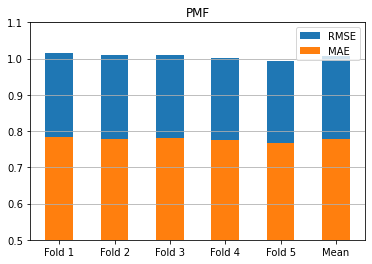

In [42]:
import matplotlib.pyplot as plt

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('PMF')
plt.grid(axis="y")
plt.ylim(0.5, 1.1) 
plt.legend()
plt.show

In [56]:
# User based Collaborative Filtering
svd = KNNBasic(sim_options = {'user_based': True })
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9733  0.9668  0.9679  0.9651  0.9689  0.9684  0.0028  
MAE (testset)     0.7475  0.7448  0.7430  0.7402  0.7450  0.7441  0.0024  
Fit time          0.27    0.30    0.25    0.25    0.26    0.27    0.02    
Test time         1.90    1.91    2.02    2.10    1.96    1.98    0.07    


{'test_rmse': array([0.97333896, 0.9667561 , 0.96786822, 0.96512174, 0.96886854]),
 'test_mae': array([0.74747295, 0.74476664, 0.74302075, 0.74023747, 0.74504123]),
 'fit_time': (0.2748234272003174,
  0.29982566833496094,
  0.2538444995880127,
  0.2548389434814453,
  0.25585126876831055),
 'test_time': (1.8999369144439697,
  1.91259765625,
  2.015162944793701,
  2.095089912414551,
  1.9607880115509033)}

In [52]:
rmse = [0.9716, 0.9779, 0.9667, 0.9634, 0.9563, 0.9672]
mae = [0.7488, 0.7508, 0.7403, 0.7396, 0.7382, 0.7435]

<function matplotlib.pyplot.show(*args, **kw)>

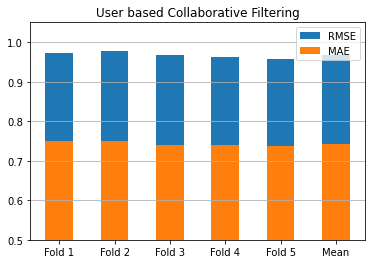

In [53]:
x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('User based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.05) 
plt.legend()
plt.show

In [57]:
# Item based Collaborative Filtering
svd = KNNBasic(sim_options = {'user_based': False })
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9279  0.9335  0.9399  0.9351  0.9359  0.9345  0.0039  
MAE (testset)     0.7139  0.7199  0.7246  0.7230  0.7215  0.7206  0.0037  
Fit time          5.35    4.80    4.92    4.75    4.71    4.91    0.23    
Test time         8.61    9.52    9.48    8.65    9.56    9.16    0.44    


{'test_rmse': array([0.92789669, 0.93347492, 0.9399388 , 0.93508554, 0.93587756]),
 'test_mae': array([0.71392548, 0.71988061, 0.72460229, 0.72296174, 0.72146234]),
 'fit_time': (5.351991415023804,
  4.8001508712768555,
  4.9179065227508545,
  4.747086524963379,
  4.713931083679199),
 'test_time': (8.60990023612976,
  9.516311407089233,
  9.478062391281128,
  8.650595426559448,
  9.563170433044434)}

In [47]:
rmse = [0.9316, 0.9318, 0.9391, 0.9379, 0.9347, 0.9350]
mae = [0.7189, 0.7201, 0.7228, 0.7239, 0.7223, 0.7216]

<function matplotlib.pyplot.show(*args, **kw)>

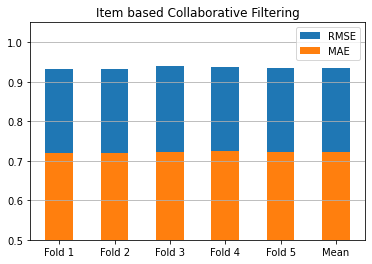

In [51]:
x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Item based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.05) 
plt.legend()
plt.show

In [63]:
# Cosine on User based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'cosine','user_based': True})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0007  0.9928  0.9912  0.9969  0.9891  0.9941  0.0042  
MAE (testset)     0.7718  0.7660  0.7677  0.7710  0.7638  0.7681  0.0030  
Fit time          0.87    1.03    0.90    0.98    0.98    0.95    0.06    
Test time         2.18    2.21    2.24    2.07    2.29    2.20    0.07    


{'test_rmse': array([1.00067417, 0.9928388 , 0.99119081, 0.99692782, 0.98905456]),
 'test_mae': array([0.77175038, 0.76604744, 0.76773091, 0.77099293, 0.76379009]),
 'fit_time': (0.8713245391845703,
  1.0292253494262695,
  0.9020843505859375,
  0.9820156097412109,
  0.9770388603210449),
 'test_time': (2.1773245334625244,
  2.20902681350708,
  2.2399017810821533,
  2.0734753608703613,
  2.2940895557403564)}

<function matplotlib.pyplot.show(*args, **kw)>

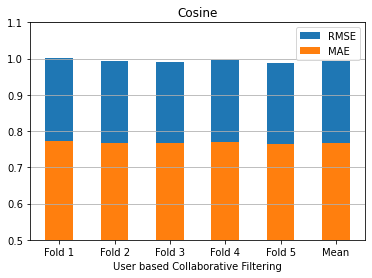

In [67]:
rmse = [1.0007, 0.9928, 0.9912, 0.9969, 0.9891, 0.9941]
mae = [0.7718, 0.7660, 0.7677, 0.7710, 0.7638, 0.7681]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Cosine')
plt.xlabel('User based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.1) 
plt.legend()
plt.show

In [64]:
# MSD on User based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'MSD','user_based': True})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9633  0.9715  0.9670  0.9627  0.9710  0.9671  0.0037  
MAE (testset)     0.7427  0.7468  0.7419  0.7406  0.7455  0.7435  0.0023  
Fit time          0.26    0.33    0.31    0.31    0.31    0.30    0.02    
Test time         2.27    2.29    2.30    2.16    2.27    2.26    0.05    


{'test_rmse': array([0.96328755, 0.97146145, 0.96703953, 0.96269589, 0.97100736]),
 'test_mae': array([0.74271253, 0.74678154, 0.74190653, 0.74061117, 0.74553151]),
 'fit_time': (0.26331043243408203,
  0.32682037353515625,
  0.30582308769226074,
  0.3108396530151367,
  0.3136024475097656),
 'test_time': (2.266467571258545,
  2.2872679233551025,
  2.2959375381469727,
  2.1561641693115234,
  2.2695295810699463)}

<function matplotlib.pyplot.show(*args, **kw)>

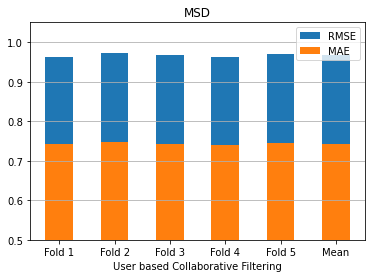

In [69]:
rmse = [0.9633, 0.9715, 0.9670, 0.9627, 0.9710, 0.9671]
mae = [0.7427, 0.7468, 0.7419, 0.7406, 0.7455, 0.7435]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('MSD')
plt.xlabel('User based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.05) 
plt.legend()
plt.show

In [86]:
# Pearson on User based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'Pearson','user_based': True})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0019  1.0068  0.9975  0.9915  1.0008  0.9997  0.0051  
MAE (testset)     0.7743  0.7790  0.7748  0.7674  0.7727  0.7736  0.0038  
Fit time          1.18    1.11    1.22    1.12    1.13    1.15    0.04    
Test time         2.29    2.00    2.05    2.25    2.12    2.14    0.11    


{'test_rmse': array([1.00192295, 1.00684439, 0.99753892, 0.99148026, 1.00084221]),
 'test_mae': array([0.77434306, 0.77896134, 0.7748261 , 0.76737247, 0.77270244]),
 'fit_time': (1.1843829154968262,
  1.1103739738464355,
  1.222533941268921,
  1.1201229095458984,
  1.1309971809387207),
 'test_time': (2.2911672592163086,
  2.004331588745117,
  2.0504913330078125,
  2.249509811401367,
  2.1219379901885986)}

<function matplotlib.pyplot.show(*args, **kw)>

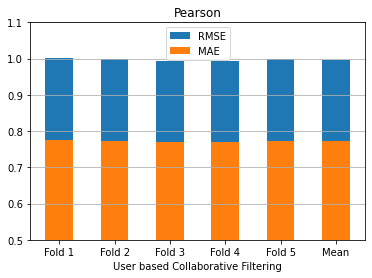

In [73]:
rmse = [1.0014, 0.9990, 0.9947, 0.9925, 0.9979, 0.9971]
mae = [0.7742, 0.7731, 0.7686, 0.7700, 0.7727, 0.7717]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Pearson')
plt.xlabel('User based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.10) 
plt.legend()
plt.show

In [87]:
# Cosine on Item based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'cosine','user_based': False})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9954  0.9964  0.9962  0.9936  0.9954  0.9954  0.0010  
MAE (testset)     0.7735  0.7769  0.7728  0.7751  0.7767  0.7750  0.0017  
Fit time          22.54   23.98   21.45   20.95   22.53   22.29   1.05    
Test time         11.18   10.63   10.04   11.19   10.31   10.67   0.46    


{'test_rmse': array([0.99539448, 0.99638091, 0.99622193, 0.9935758 , 0.99542158]),
 'test_mae': array([0.77348569, 0.77689525, 0.77275355, 0.77513649, 0.77667405]),
 'fit_time': (22.538509368896484,
  23.98214316368103,
  21.449933290481567,
  20.953981399536133,
  22.533920764923096),
 'test_time': (11.176972150802612,
  10.63116979598999,
  10.036210775375366,
  11.185604095458984,
  10.312542915344238)}

<function matplotlib.pyplot.show(*args, **kw)>

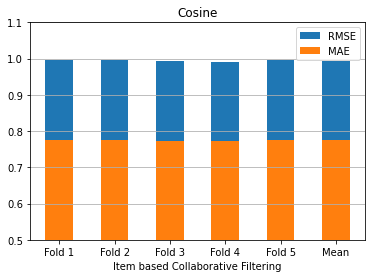

In [75]:
rmse = [0.9975, 0.9951, 0.9925, 0.9896, 0.9968, 0.9943]
mae = [0.7766, 0.7751, 0.7738, 0.7718, 0.7767, 0.7748]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Cosine')
plt.xlabel('Item based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.1) 
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

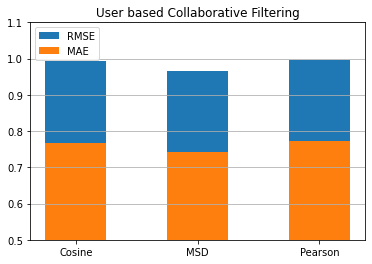

In [77]:
rmse = [0.9941, 0.9671, 0.9971]
mae = [0.7681, 0.7435, 0.7717]

x = range(3)
label_lists = ['Cosine', 'MSD', 'Pearson']
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('User based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.1) 
plt.legend()
plt.show

In [78]:
# MSD on Item based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'MSD','user_based': False})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9421  0.9354  0.9286  0.9323  0.9341  0.9345  0.0044  
MAE (testset)     0.7274  0.7191  0.7183  0.7192  0.7195  0.7207  0.0034  
Fit time          6.19    6.93    5.80    5.47    5.24    5.93    0.59    
Test time         12.44   12.04   11.12   10.48   10.14   11.25   0.88    


{'test_rmse': array([0.9421065 , 0.93540682, 0.92859824, 0.9322907 , 0.93411368]),
 'test_mae': array([0.72739003, 0.71914682, 0.71827631, 0.71918359, 0.7195157 ]),
 'fit_time': (6.191258192062378,
  6.925668954849243,
  5.799262046813965,
  5.469772577285767,
  5.240434646606445),
 'test_time': (12.444624900817871,
  12.041251420974731,
  11.121269226074219,
  10.484580039978027,
  10.141892910003662)}

<function matplotlib.pyplot.show(*args, **kw)>

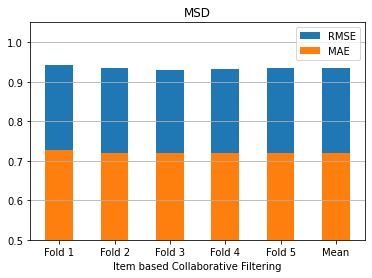

In [80]:
rmse = [0.9421, 0.9354, 0.9286, 0.9323, 0.9341, 0.9345]
mae = [0.7274, 0.7191, 0.7183, 0.7192, 0.7195, 0.7207]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('MSD')
plt.xlabel('Item based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.05) 
plt.legend()
plt.show

In [88]:
# Pearson on Item based Collaborative Filtering
svd = KNNBasic(sim_options = {'name':'Pearson','user_based': False})
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9888  0.9842  0.9886  0.9974  0.9882  0.9894  0.0043  
MAE (testset)     0.7669  0.7627  0.7667  0.7737  0.7707  0.7681  0.0038  
Fit time          32.59   32.47   35.96   30.85   29.97   32.37   2.05    
Test time         10.04   12.45   11.70   11.73   10.56   11.29   0.87    


{'test_rmse': array([0.9888382 , 0.98416161, 0.98858646, 0.99740629, 0.9882084 ]),
 'test_mae': array([0.76689913, 0.76269747, 0.76669322, 0.77371306, 0.77069918]),
 'fit_time': (32.59060287475586,
  32.46568274497986,
  35.95891046524048,
  30.84596037864685,
  29.96687912940979),
 'test_time': (10.035069704055786,
  12.446287155151367,
  11.703556299209595,
  11.725853443145752,
  10.562217473983765)}

<function matplotlib.pyplot.show(*args, **kw)>

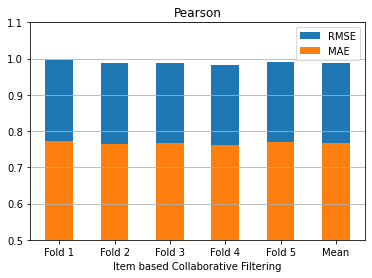

In [84]:
rmse = [0.9962, 0.9878, 0.9868, 0.9810, 0.9913, 0.9886]
mae = [0.7740, 0.7638, 0.7679, 0.7615, 0.7690, 0.7672]

x = range(6)
label_lists = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Mean',]
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Pearson')
plt.xlabel('Item based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.10) 
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

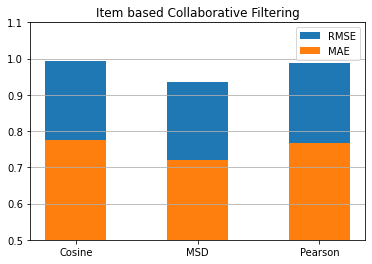

In [85]:
rmse = [0.9943, 0.9345, 0.9886]
mae = [0.7748, 0.7207, 0.7672]

x = range(3)
label_lists = ['Cosine', 'MSD', 'Pearson']
plt.bar(x, rmse, width=0.5, tick_label=label_lists, label="RMSE")
plt.bar(x, mae, width=0.5, tick_label=label_lists, label="MAE")

plt.title('Item based Collaborative Filtering')
plt.grid(axis="y")
plt.ylim(0.5, 1.1) 
plt.legend()
plt.show

In [94]:
# User based Collaborative Filtering with different K
for k in range(1,21):
    svd = KNNBasic(k, sim_options = {'user_based': True })
    cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2102  1.2148  1.2062  1.2055  1.2138  1.2101  0.0038  
MAE (testset)     0.9043  0.9046  0.8978  0.9034  0.9042  0.9029  0.0026  
Fit time          0.27    0.35    0.33    0.33    0.31    0.32    0.03    
Test time         1.09    1.12    1.23    1.20    1.32    1.19    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [114]:
x = range(1,21)
rmse = [1.2101,1.0745,1.0250,0.9989,0.9858,0.9789,0.9716,0.9681,0.9662,0.9654,0.9640,0.9627,0.9625,0.9625,0.9634,0.9626,0.9635,0.9609,0.9632,0.9606]

<function matplotlib.pyplot.show(*args, **kw)>

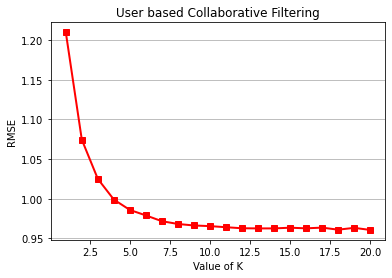

In [120]:
plt.plot(x, rmse, 'rs-', linewidth = 2)
plt.title('User based Collaborative Filtering')
plt.ylabel('RMSE')
plt.xlabel('Value of K')
plt.grid(axis="y")
plt.show

In [121]:
# Item based Collaborative Filtering with different K
for k in range(1,21): 
    svd = KNNBasic(k, sim_options = {'user_based': False})
    cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3116  1.3075  1.2958  1.2907  1.2992  1.3009  0.0076  
MAE (testset)     0.9717  0.9682  0.9574  0.9513  0.9573  0.9612  0.0076  
Fit time          5.93    5.67    5.43    5.64    5.58    5.65    0.16    
Test time         7.60    7.79    7.77    7.60    7.45    7.64    0.13    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [122]:
x = range(1,21)
rmse = [1.3009,1.1425,1.0790,01.0445,1.0229,1.0086,0.9988,0.9871,0.9805,0.9744,0.9694,0.9677,0.9633,0.9618,0.9550,0.9530,0.9523,0.9516,0.9485,0.9481]

<function matplotlib.pyplot.show(*args, **kw)>

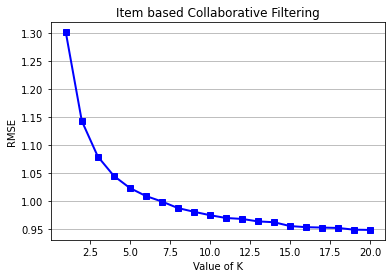

In [123]:
plt.plot(x, rmse, 'bs-', linewidth = 2)
plt.title('Item based Collaborative Filtering')
plt.ylabel('RMSE')
plt.xlabel('Value of K')
plt.grid(axis="y")
plt.show